# Preparação do ambiente e consultas teste

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pylab as plt
import cufflinks as cf

low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90
pd.options.display.float_format = '{:.4f}'.format

## Importação dos Arquivos CSV

In [68]:
gastos2017 = pd.read_csv('Ano-2017.csv', low_memory=False,delimiter=';', encoding='UTF-8', decimal=',')
gastos2014 = pd.read_csv('Ano-2014.csv', low_memory=False,delimiter=';', encoding='UTF-8', decimal=',')
gastos2013 = pd.read_csv('Ano-2013.csv', low_memory=False,delimiter=';', encoding='UTF-8', decimal=',')
proposicoes2017 = pd.read_csv('proposicoesAutores-2017.csv', low_memory=False,delimiter=';', encoding='UTF-8', decimal=',')
proposicoes2014 = pd.read_csv('proposicoesAutores-2014.csv', low_memory=False,delimiter=';', encoding='UTF-8', decimal=',')
proposicoes2013 = pd.read_csv('proposicoesAutores-2013.csv', low_memory=False,delimiter=';', encoding='UTF-8', decimal=',')

In [70]:
gastos2017.rename(columns={'txNomeParlamentar': 'NOME',
                  }, inplace=True)
gastos2014.rename(columns={'txNomeParlamentar': 'NOME',
                  }, inplace=True)
gastos2013.rename(columns={'txNomeParlamentar': 'NOME',
                  }, inplace=True)

## Teste de controle de Gasto de um Deputado

In [65]:
df = gastos2017.loc[gastos2017['NOME'] == 'TIRIRICA']
df['vlrLiquido'].sum()

87706.56000000001

# Funções Utilizadas no Projeto

In [94]:
# Recebe o Dataframe de gastos e monta um dataframe contendo apenas o Nome do Deputado e o total de gastos
def createDataframeGastosDeputado(df):
    a = df.groupby(
        by=['NOME'])['vlrLiquido'].sum()
    gastosDeputado = pd.DataFrame({'NOME': a.index, 'GASTOS':a.values})
    return gastosDeputado

#Recebe o DataFrame de proposições e monta um dataframe contendo apenas o nome do deputado e o número total de proposições
def createDataframeProposicoesDeputado(df):
    df = df['nomeAutor'].str.upper()
    df = pd.DataFrame(df)
    series = df.groupby(['nomeAutor']).size()
    proposicoesautor = pd.DataFrame({'NOME': series.index, 'PROPOSIÇÕES':series.values})
    return proposicoesautor

#Recebe o DataFrame de gastos e o ano e monta um Dataframe com os gastos de cada descrição em cada mês
def create_TableDescription(df,ano):
    dfmeses = pd.DataFrame(df[df['numMes'] == 1].groupby(by=['txtDescricao'])['vlrLiquido'].sum())
    dfmeses['mes'] = 1
    dfmeses.head()
    for x in range(11):
        dfaux = pd.DataFrame(df[df['numMes'] == x+2].groupby(by=['txtDescricao'])['vlrLiquido'].sum())
        dfaux['mes'] = x+2
        frames=[dfmeses,dfaux]
        dfmeses = pd.concat(frames,sort=False)

    dfmeses = pd.DataFrame({'txtDescricao': dfmeses.index, 'vlrLiquido':dfmeses['vlrLiquido'], 'numMes': dfmeses['mes']})
    dfmeses.reset_index(drop = True, inplace = True)
    dfmeses['ano'] = ano
    return dfmeses

#Recebe o DataFrame proveniente da função createDataframeGastosDeputado e monta um gráfico baseado em faixas de gasto de 100000 em 100000
def montarGraficoFaixadeGastos(gastosDeputado):
    faixa1 = gastosDeputado[gastosDeputado['GASTOS'] < 100000]['NOME'].count()
    faixa2 = gastosDeputado[(gastosDeputado['GASTOS'] < 200000) & (gastosDeputado['GASTOS']>= 100000)]['NOME'].count()
    faixa3 = gastosDeputado[(gastosDeputado['GASTOS'] < 300000) & (gastosDeputado['GASTOS']>= 200000)]['NOME'].count()
    faixa4 = gastosDeputado[(gastosDeputado['GASTOS'] < 400000) & (gastosDeputado['GASTOS']>= 300000)]['NOME'].count()
    faixa5 = gastosDeputado[(gastosDeputado['GASTOS'] >= 400000)]['NOME'].count()
    data = {'Faixa de Gasto':['<100000', 'Entre 100000 e 200000','Entre 200000 e 300000','Entre 300000 e 400000','>400000'],'Número de entradas':[faixa1,faixa2,faixa3,faixa4,faixa5]}
    faixadegastos = pd.DataFrame(data = data)
    faixadegastos['Número de entradas'].plot(labels = ['','','','',''],kind='pie',autopct='%.2f', figsize= (9,9),title = 'Gráfico com porcentagem por faixa de gastos')#.get_yaxis().set_visible(False)
    plt.legend(faixadegastos['Faixa de Gasto'])
    plt.axis('equal')
    plt.axis('off')
    plt.show()

#Recebe os DataFrames provenientes de createDataframeGastosDeputado e createDataframeProposicoesDeputado e calcula a média custo/proposição da câmara dos deputados
def calcularMediaProposicao(gastos,proposicoes):
    gastos = gastos['vlrLiquido'].sum()/len(proposicoes)
    print('{0:.2f}'.format(gastos) , "reais por proposição na câmara dos deputados")
    
#Recebe os Dataframes provenientes de createDataframeGastosDeputado e createDataframeProposicoesDeputado e um boolean (True = Deputados que menos gastaram, False= Mais gastaram) e imprime um gráfico com os 15 Deputados e seus respectivos gastos
def graficoDeputadosGastosProposicao(gastosDeputado, proposicoesautor,asc):
    result = pd.merge(proposicoesautor, gastosDeputado, on='NOME', how='inner')
    media = result['GASTOS']/result['PROPOSIÇÕES']
    result['MEDIA'] = media
    a = result.sort_values(['MEDIA'], ascending = asc).head(15)
    if asc:
        a = a.sort_values(['MEDIA'], ascending = False)
    plt.barh(a['NOME'], a['MEDIA'])
    plt.grid()
    plt.show()


## Execução das Funções para os DataFrames

In [72]:
gastosDeputado2017 = createDataframeGastosDeputado(gastos2017)
gastosDeputado2014 = createDataframeGastosDeputado(gastos2014)
gastosDeputado2013 = createDataframeGastosDeputado(gastos2013)
dfmeses2017 = create_TableDescription(gastos2017,2017)
dfmeses2014 = create_TableDescription(gastos2014,2014)
dfmeses2013 = create_TableDescription(gastos2013,2013)
proposicoesautor2017 = createDataframeProposicoesDeputado(proposicoes2017)
proposicoesautor2014 = createDataframeProposicoesDeputado(proposicoes2014)
proposicoesautor2013 = createDataframeProposicoesDeputado(proposicoes2013)

# Análise dos Gastos dos Deputados

## Gastos por Deputado

In [41]:
gastosDeputado2017.sort_values(by = ['GASTOS'],ascending=False).head(15) ##Gastos por cada deputado no ano de 2017

,NOME,GASTOS
470,ROCHA,590760.0700
453,REMÍDIO MONAI,577421.8700
149,EDIO LOPES,556688.3500
362,MARIA HELENA,555107.5900
241,JHONATAN DE JESUS,554722.4200
220,HIRAN GONÇALVES,546067.1200
88,CARLOS ANDRADE,545522.7800
492,RÔMULO GOUVEIA,541454.1400
13,ALAN RICK,537890.7300
296,LEO DE BRITO,537778.7700


### Descrição dos gastos totais

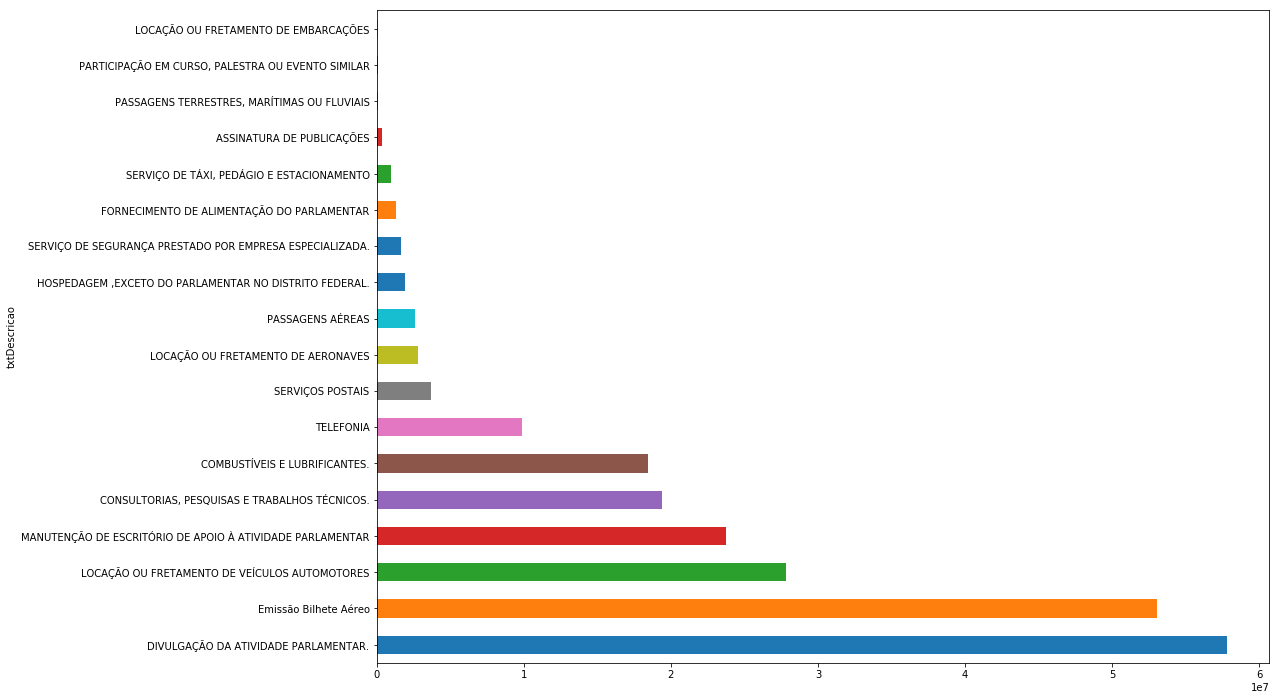

In [12]:
gastos2017.groupby(
    by=['txtDescricao'])['vlrLiquido'].sum().sort_values(ascending=False).plot(kind = 'barh',figsize=(16,12))

In [13]:
gastos2017.groupby(
    by=['txtDescricao'])['vlrLiquido'].sum().sort_values(ascending=False).head(10)

txtDescricao
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.                        57794360.6400
Emissão Bilhete Aéreo                                       53012103.4600
LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES               27838888.5200
MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR   23730710.9000
CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.               19384379.3000
COMBUSTÍVEIS E LUBRIFICANTES.                               18451497.8200
TELEFONIA                                                    9911318.5900
SERVIÇOS POSTAIS                                             3672073.7000
LOCAÇÃO OU FRETAMENTO DE AERONAVES                           2842802.4600
PASSAGENS AÉREAS                                             2607145.2700
Name: vlrLiquido, dtype: float64

# Análise de Preposições

## Análises de Proposições por Deputado

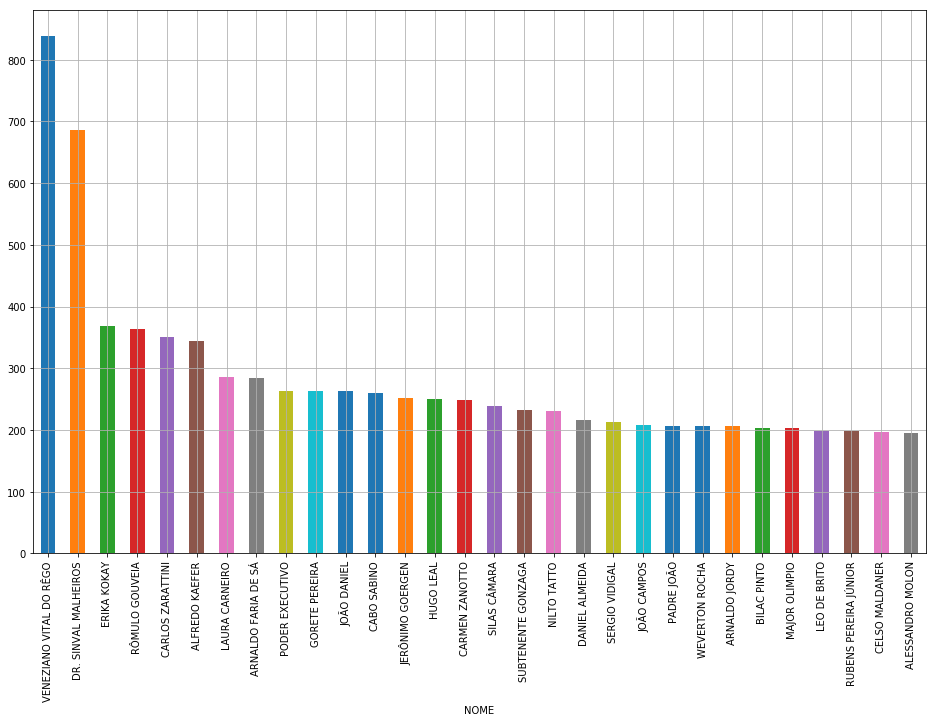

In [48]:
proposicoesautor2017.groupby(
    by=['NOME'])['PROPOSIÇÕES'].sum().sort_values(ascending=False).head(30).plot(kind='bar', figsize=(16,10), grid = True)


## Gasto por proposição

In [102]:
calcularMediaProposicao(gastos2017,proposicoes2017)

4529.24 reais por proposição na câmara dos deputados


## Deputados que mais e que menos gastam por proposição

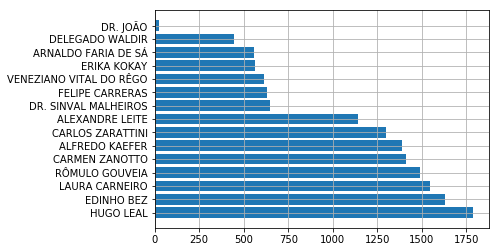

In [95]:
graficoDeputadosGastosProposicao(gastosDeputado2017, proposicoesautor2017,True)


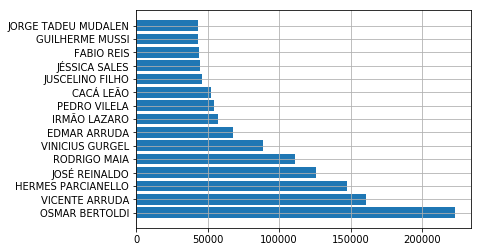

In [96]:
graficoDeputadosGastosProposicao(gastosDeputado2017, proposicoesautor2017,False)

## Análise por mês dos gastos de 2017

### Criação de gráfico por descrição de acordo com o mês

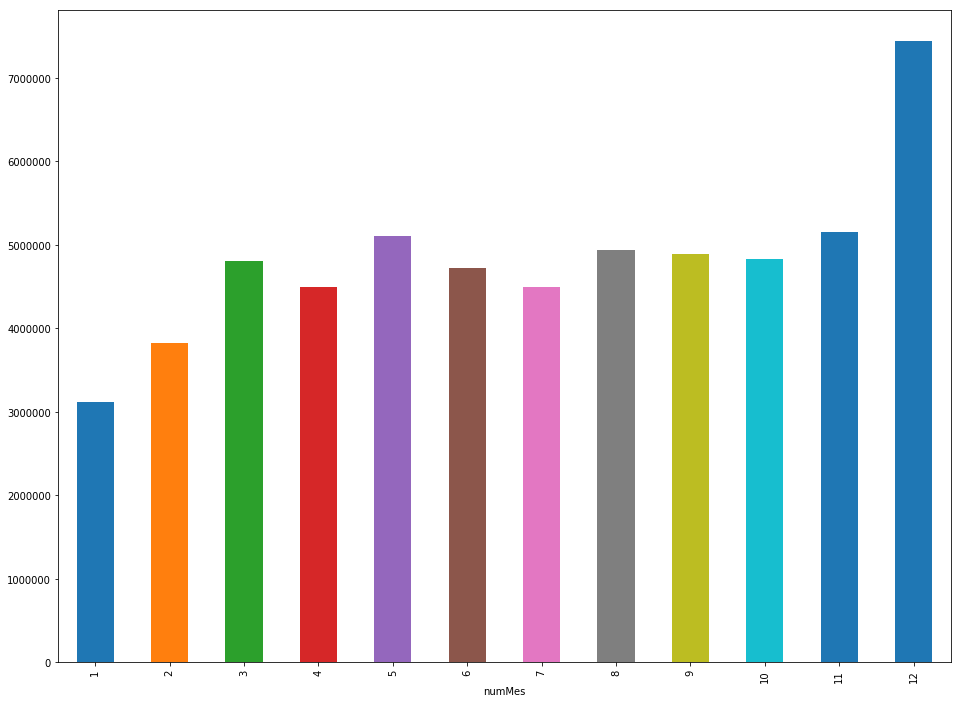

In [75]:
dfmeses2017[dfmeses2017['txtDescricao'] == 'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.'].groupby(['numMes'])['vlrLiquido'].sum().plot(kind = 'bar',figsize=(16,12))    


# Utilização de outros anos na pesquisa

### Análise por mês do gasto em Divulgação da Atividade Parlamentar em 2014

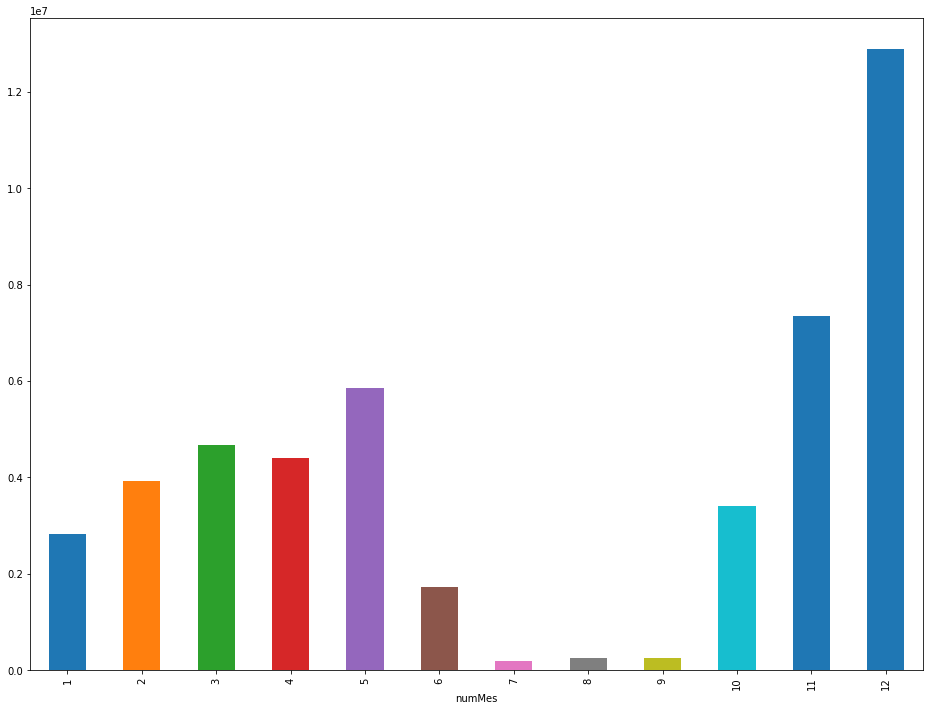

In [76]:
dfmeses2014[dfmeses2014['txtDescricao'] == 'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.'].groupby(['numMes'])['vlrLiquido'].sum().plot(kind = 'bar',figsize=(16,12))    

### Análise por mês do gasto em Divulgação da Atividade Parlamentar em 2013

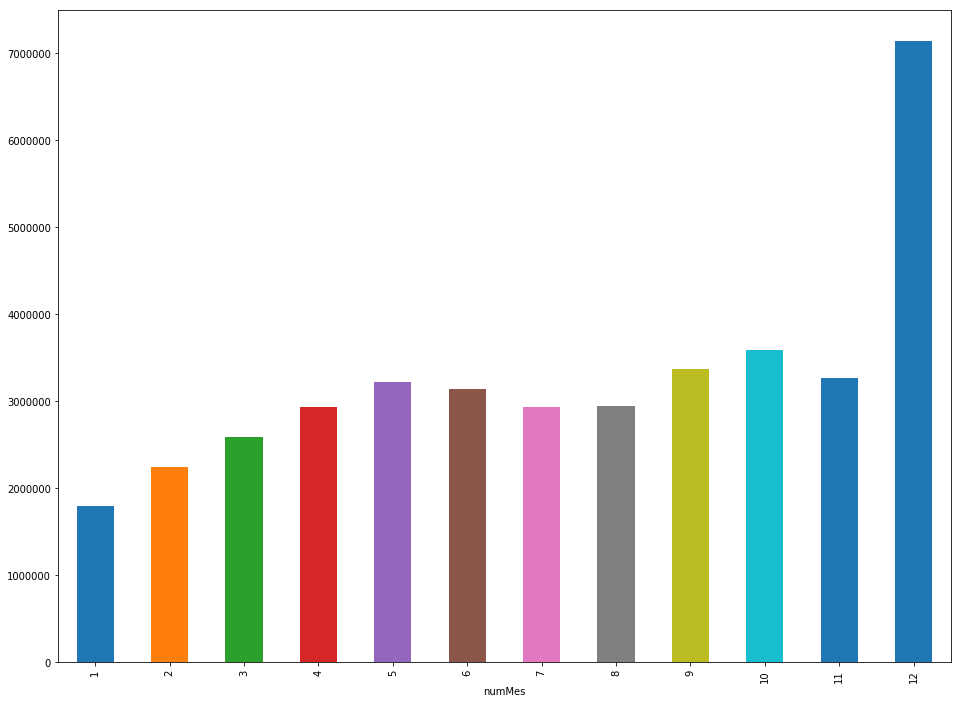

In [101]:
dfmeses2013[dfmeses2013['txtDescricao'] == 'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.'].groupby(['numMes'])['vlrLiquido'].sum().plot(kind = 'bar',figsize=(16,12))    

## Gráficos de faixa de gasto por deputado nos anos de 2017,2014 e 2013

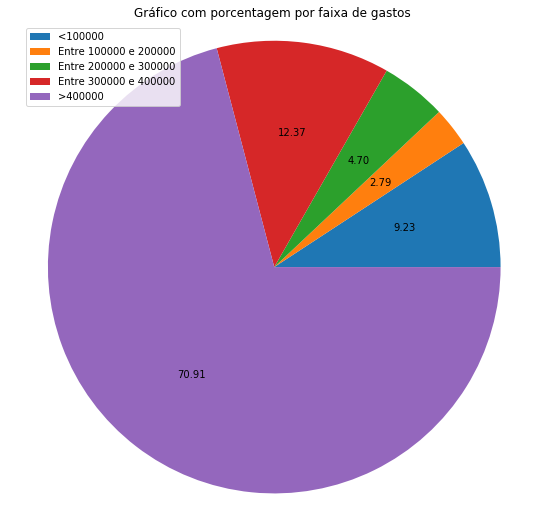

In [97]:
montarGraficoFaixadeGastos(gastosDeputado2017)

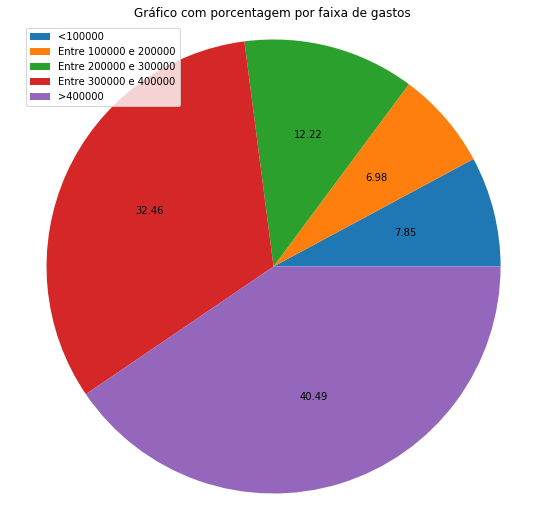

In [99]:
montarGraficoFaixadeGastos(gastosDeputado2014)

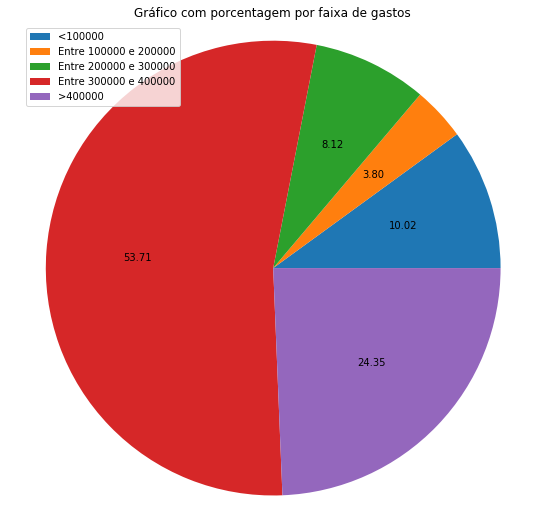

In [100]:
montarGraficoFaixadeGastos(gastosDeputado2013)